In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import pandas as pd
import numpy as np
import os
import pybedtools
import warnings
import gffutils
from collections import defaultdict
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', 500)
from tqdm import tnrange, tqdm_notebook
from matplotlib_venn import venn2
# import score_edits_total_coverage as se
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'

rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})

In [2]:
sns.set(font_scale=1.3)

In [3]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs/'
# output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_2/outputs/'

In [4]:
bound_genes_file1 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_5/outputs/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.cds_3utr_siggenes.tsv'
bound_genes_file2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_5/outputs/SLBP_reproducible_peaks.bed.annotated_proxdist_miRlncRNA.cds_3utr_siggenes.tsv'
# bound_genes_file2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/histone_genes_with_cds_or_3utr_annotations.txt'
# bound_genes_file2 = '/home/rmarina/projects/apobec/ref_files/histone_genes.bed'

# bound_genes_file2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/figure_5/outputs/TIA1_reproducible_peaks.bed.annotated_proxdist_miRlncRNA.exonic_siggenes.tsv'

# rep1_file = os.path.join(input_dir, 'Sample28_S21_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

rep1_file = os.path.join(input_dir, 'RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Sample27_S37_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Sample28_S21_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Tia1_1000ng_1_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Tia1_1000ng_2_S27_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Sample28_S21_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Tia1_1000ng_1_S14_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Sample14_S13_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Tia1_1000ng_2_S27_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'Sample28_S21_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'Sample27_S37_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

rep2_file = os.path.join(input_dir, 'SLBP_1000_72hr_merged_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'SLBP_1000_72hr_A_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'SLBP_1000_72hr_B_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'SLBP_1000_72hr_C_merged_R1.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt')

# rep1_file = os.path.join(input_dir, 'SLBP_1000_48hr_merged_a0_b0_e0.01.annotated.exons.merged.txt')
# rep2_file = os.path.join(input_dir, 'SLBP_1000_72hr_merged_a0_b0_e0.01.annotated.exons.merged.txt')

# Find any gene that is edited in each rep.
- These files also include zero edited sites (edited_over_all_c = 0). 

In [5]:
rep1 = pd.read_csv(rep1_file, sep='\t', index_col=0)
rep2 = pd.read_csv(rep2_file, sep='\t', index_col=0)

rep1.head()

,edit_coverage,editable_coverage,all_c_coverage,edited_over_edited_c,edited_over_all_c
name,,,,,
ENSG00000228532.2,71,340,801,0.208824,0.088639
ENSG00000204899.5,685,4824,8519,0.141998,0.080408
ENSG00000101132.5,265,2134,3651,0.124180,0.072583
ENSG00000243317.3,406,3097,5823,0.131095,0.069724
ENSGR0000002586.13,113,537,1932,0.210428,0.058489


In [6]:
bound_genes1 = set(pd.read_csv(bound_genes_file1, sep='\t', names=['chrom','start','end','name','score','strand','geneid'])['geneid'])
bound_genes2 = set(pd.read_csv(bound_genes_file2, sep='\t', names=['chrom','start','end','name','score','strand','geneid'])['geneid'])
# bound_genes2 = set(pd.read_csv(bound_genes_file2, sep='\t', names=['chrom','start','end','geneid','genename','strand'])['geneid'])
# bound_genes2 = set(pd.read_csv(bound_genes_file2, sep='\t', names=['geneid'])['geneid'])

print("Number of genes bound in 3'UTR or CDS: \n{} -> {}\n{} -> {}".format(
    os.path.basename(bound_genes_file1),
    len(bound_genes1),
    os.path.basename(bound_genes_file2),
    len(bound_genes2)
))

Number of genes bound in 3'UTR or CDS: 
EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.cds_3utr_siggenes.tsv -> 342
SLBP_reproducible_peaks.bed.annotated_proxdist_miRlncRNA.cds_3utr_siggenes.tsv -> 53


In [7]:
col1 = '{}'.format(os.path.basename(rep1_file).split('.')[0])
col2 = '{}'.format(os.path.basename(rep2_file).split('.')[0])
merged = pd.merge(rep1, rep2, how='outer', left_index=True, right_index=True)[['edited_over_all_c_x', 'edited_over_all_c_y']].fillna(0)
merged.columns = [col1, col2]
print("Total number of genes counted (edited or not) between both reps: {}".format(merged.shape[0]))
merged.head()

Total number of genes counted (edited or not) between both reps: 12149
12149 12149


,RBFOX2-1000_S20_L002_R1_001,SLBP_1000_72hr_merged_a0_b0_e0
name,,
ENSG00000000003.10,0.032866,0.000333
ENSG00000000419.8,0.008471,0.000263
ENSG00000000457.9,0.000000,0.000102
ENSG00000000460.12,0.004489,0.000606
ENSG00000001036.9,0.006566,0.000463


Text(0.5, 0.98, 'EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.annotated.cds_3utr_siggenes.tsv')

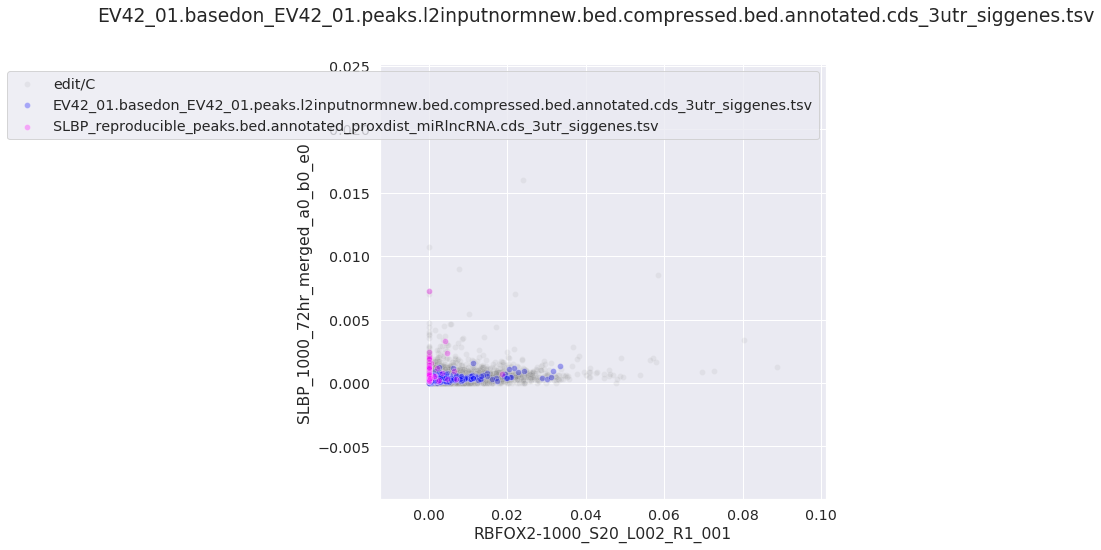

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
# sns.scatterplot(x=col1, y=col2, data=merged, color='grey', ax=ax, label='edit/C', alpha=0.1)

sns.scatterplot(x=col1, y=col2, data=merged, color='grey', ax=ax, label='edit/C', alpha=0.1)
sns.scatterplot(x=col1, y=col2, data=merged.loc[bound_genes1].dropna(), color='blue', ax=ax, alpha=0.3, label='{}'.format(os.path.basename(bound_genes_file1)))
sns.scatterplot(x=col1, y=col2, data=merged.loc[bound_genes2].dropna(), color='magenta', ax=ax, alpha=0.3, label='{}'.format(os.path.basename(bound_genes_file2)))

# ax.set_xlim(-0.001, 0.015)
# ax.set_ylim(-0.001, 0.015)
fig.suptitle(os.path.basename(bound_genes_file1))

### We have a handful of genes that appear to be bound that were not found to be edited.
- Just check a few of these on the genome browser
- (the ENSG|ENSG ones are ambiguously bound, so it's okay to skip).
- The rest seem to be of low expression, low enough that we wouldn't be seeing any edits here.

In [9]:
_df = merged.loc[bound_genes1]
_df[_df.isna().any(axis=1)]

,RBFOX2-1000_S20_L002_R1_001,SLBP_1000_72hr_merged_a0_b0_e0
name,,
ENSG00000114923.12,NaN,NaN
ENSG00000213398.3,NaN,NaN
ENSG00000213906.5|ENSG00000272658.1,NaN,NaN
ENSG00000185386.10,NaN,NaN
ENSG00000198743.5|ENSG00000272962.1,NaN,NaN
ENSG00000186654.16|ENSG00000248405.5|ENSG00000241484.5,NaN,NaN
ENSG00000213132.2,NaN,NaN
ENSG00000120049.14,NaN,NaN
ENSG00000179698.9,NaN,NaN


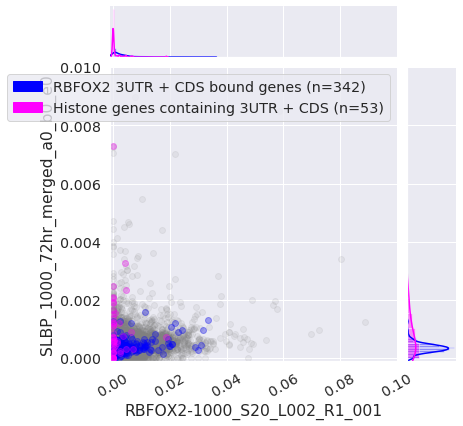

In [10]:
def colored_scatter(x, y, c=None, scatter_alpha=0.3):
    def scatter(*args, **kwargs):
        args = (x, y)
        if c is not None:
            kwargs['c'] = c
        kwargs['alpha'] = scatter_alpha
        plt.scatter(*args, **kwargs)

    return scatter

def multivariateGrid(g, col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.3, output_file=None, legends=[]):
    

    """g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )"""
    color = None
    for name, df_group in df.groupby(col_k):
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True,
        )
    
    plt.xlim(-0.001, 0.1)
    plt.ylim(-0.0001, 0.01)
    plt.legend(handles=legends)
    g.savefig(output_file)
    return g
    
bound_1 = merged.loc[bound_genes1].fillna(0)
bound_1['kind'] = 'blue'  # os.path.basename(bound_genes_file1).split('.')[0]
bound_2 = merged.loc[bound_genes2].fillna(0)
bound_2['kind'] = 'magenta'  # os.path.basename(bound_genes_file2).split('.')[0]

bound = pd.concat([bound_1, bound_2])

output_file = os.path.join(output_dir, '{}_vs_{}_bound_{}_vs_{}.pdf'.format(
    col1, 
    col2,
    os.path.basename(bound_genes_file1).split('.')[0],
    os.path.basename(bound_genes_file2).split('.')[0]
))

g = sns.JointGrid(
    x=col1,
    y=col2,
    data=merged,
)

g.plot_joint(
    colored_scatter(
        merged[col1].values, 
        merged[col2].values,
        scatter_alpha=0.1,
        c='grey'
    )
)

"""blue_patch = mpatches.Patch(color='blue', label=os.path.basename(bound_genes_file1).split('.')[0])
magenta_patch = mpatches.Patch(color='magenta', label=os.path.basename(bound_genes_file2).split('.')[0])"""

blue_patch = mpatches.Patch(color='blue', label='RBFOX2 3UTR + CDS bound genes (n={})'.format(bound_1.shape[0]))
magenta_patch = mpatches.Patch(color='magenta', label='Histone genes containing 3UTR + CDS (n={})'.format(bound_2.shape[0]))
j = multivariateGrid(
    g, col1, col2, 'kind', 
    df=bound, k_is_color=True, 
    output_file=output_file, legends=[
        blue_patch, magenta_patch
    ]
)

for tick in j.ax_joint.get_xticklabels():
    tick.set_rotation(30)

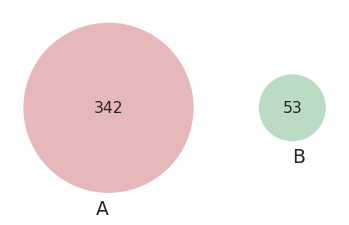

In [11]:
venn2([bound_genes1, bound_genes2])

In [12]:
pd.concat([merged.loc[bound_genes1], merged.loc[bound_genes2]]).sort_values(by=[col1, col2], ascending=[True, False]).head()

,RBFOX2-1000_S20_L002_R1_001,SLBP_1000_72hr_merged_a0_b0_e0
name,,
ENSG00000197914.2,0.0,0.007279
ENSG00000181218.4,0.0,0.002470
ENSG00000196176.7,0.0,0.002093
ENSG00000198374.3,0.0,0.002050
ENSG00000203814.5,0.0,0.001944


([], <a list of 0 Text xticklabel objects>)

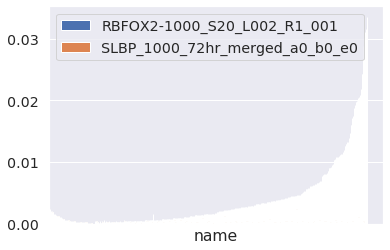

In [13]:
pd.concat([merged.loc[bound_genes1], merged.loc[bound_genes2]]).sort_values(by=[col1, col2], ascending=[True, False]).plot(kind='bar')
# plt.ylim(0, 0.0401)
plt.xticks([], [])